# Text extraction

In this example, you will learn how to extract text from images/documents and format the output in different ways using MLX-VLM library and `Qwen2-VL` model.


## Structured outputs
- Image to markdown
- Image to json
- Image to latex

In [1]:
from mlx_vlm import load, apply_chat_template, generate
from mlx_vlm.utils import load_image

In [ ]:
# Load model and processor
qwen_vl_model, qwen_vl_processor = load("mlx-community/Qwen2-VL-7B-Instruct-4bit")
qwen_vl_config = qwen_vl_model.config

## Image to markdown

In [74]:
image = load_image("images/paper.png")

messages = [
    {"role": "system", "content": """
    You are an expert at extracting text from images. Format your response in markdown.
    Format your response as follows:
    # Title
    - Authors, Affiliation, Email
    ## Subtitle
    ### Subsubtitle
    Paragraph
    """},
    {"role": "user", "content": "Extract all the text from the image."}
]

In [75]:
# Apply chat template
prompt = apply_chat_template(qwen_vl_processor, qwen_vl_config, messages)

In [76]:
# Generate text
qwen_vl_output = generate(
    qwen_vl_model,
    qwen_vl_processor,
    prompt,
    image,
    max_tokens=1000,
    temperature=0.7,
    verbose=True,
)

In [77]:
print(qwen_vl_output)

# Reducing Transformer Key-Value-Value Cache Size with Cross-Layer Attention

## Authors, Affiliation, Email
- **William Brandon** - MIT CSAIL, [wbrandon@csail.mit.edu](mailto:wbrandon@csail.mit.edu)
- **Mayank Mishra** - MIT-IBM Watson AI Lab, [mmishra@csail.mit.edu](mailto:mmishra@csail.mit.edu)
- **Aniruddha Nrusimha** - MIT CSAIL, [aniruddha@csail.mit.edu](mailto:aniruddha@csail.mit.edu)

## Abstract
Key-value (KV) caching plays an essential role in accelerating decoding for transformer-based autoregressive large language models (LLMs). However, the amount of memory required to store the KV cache can become prohibitive at long sequence lengths and large batch sizes. Since the invention of the transformer, two of the most effective interventions discovered for reducing the size of the KV cache have been Multi-Query-Query Attention (MQA) and its generalization, Grouped-Query-Query Attention (GQA). MQA and GQA both modify the design of the attention block so that multiple query heads 

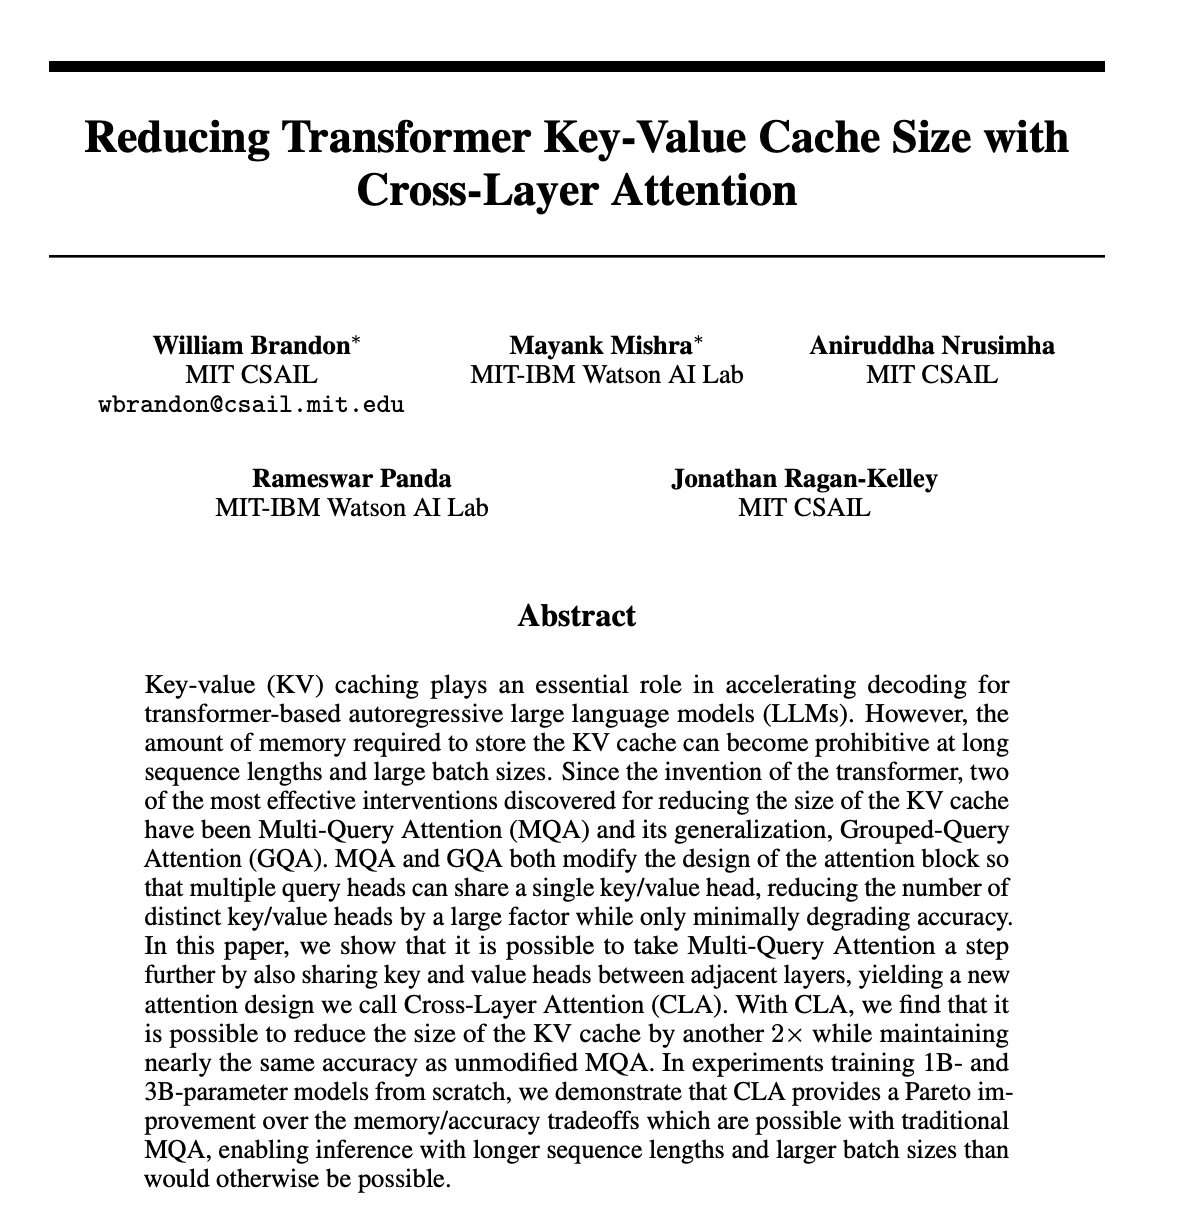

In [78]:
image

## Image to json

In [160]:
image = load_image("images/graph.png")

messages = [
    {"role": "system", "content": "You are an expert at extracting text from images. Format your response in json."},
    {"role": "user", "content": "Extract the names, labels and y coordinates from the image."}
]

In [161]:
# Apply chat template
prompt = apply_chat_template(qwen_vl_processor, qwen_vl_config, messages)

In [162]:
# Generate text
qwen_vl_output = generate(
    qwen_vl_model,
    qwen_vl_processor,
    prompt,
    image,
    max_tokens=1000,
    temperature=0.7,
    verbose=True,
)

In [163]:
print(qwen_vl_output)

```json
{
  "names": [
    "Qwen2-VL-72B-Instruct-4bit"
  ],
  "labels": [
    "Before",
    "After"
  ],
  "y_coordinates": [
    3.973,
    5.324
  ]
}
```


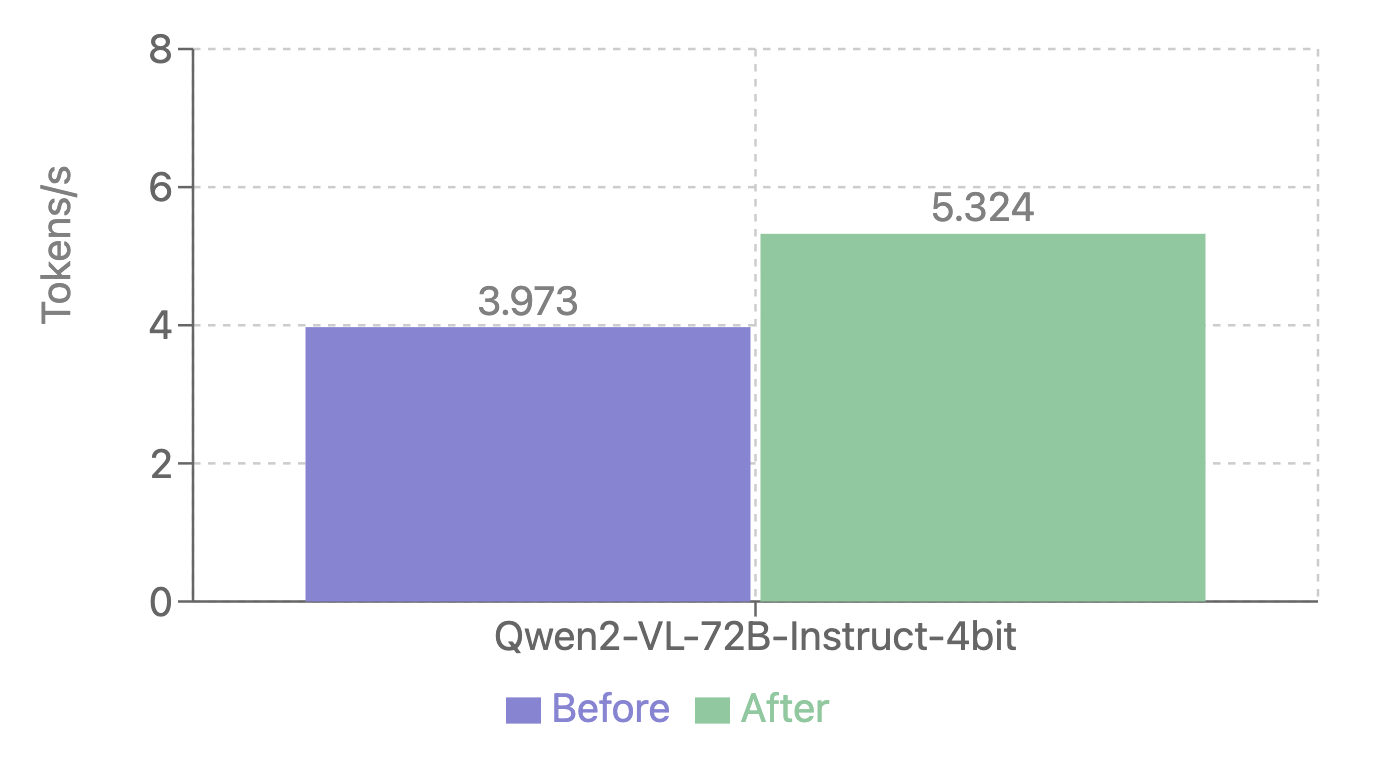

In [155]:
image

## Image to latex

In [134]:
image = load_image("images/latex.png")

messages = [
    {"role": "user", "content": "Extract the text from the image and format it into latex."}
]

In [135]:
# Apply chat template
prompt = apply_chat_template(qwen_vl_processor, qwen_vl_config, messages)

In [136]:
# Generate text
qwen_vl_output = generate(
    qwen_vl_model,
    qwen_vl_processor,
    prompt,
    image,
    max_tokens=1000,
    temperature=0.7,
    verbose=True,
)

In [137]:
# Display latex code, import the necessary libraries
from IPython.display import Latex
Latex(qwen_vl_output)

<IPython.core.display.Latex object>

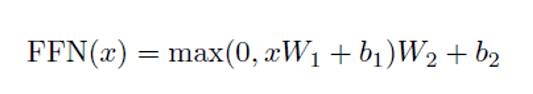

In [138]:
image